In [168]:
import numpy as np
import pandas as pd

import lazypredict
from lazypredict.Supervised import LazyClassifier

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [169]:
df = pd.read_csv("Dataset/Tree_Data.csv")
df.head()

,No,Plot,Subplot,Species,Light_ISF,Light_Cat,Core,Soil,Adult,Sterile,...,AMF,EMF,Phenolics,Lignin,NSC,Census,Time,Event,Harvest,Alive
0,126,1,C,Acer saccharum,0.11,Med,2017,Prunus serotina,I,Non-Sterile,...,22.00,NaN,-0.56,13.86,12.15,4,14.00,1.00,NaN,NaN
1,11,1,C,Quercus alba,0.11,Med,2017,Quercus rubra,970,Non-Sterile,...,15.82,31.07,5.19,20.52,19.29,33,115.50,0.00,NaN,X
2,12,1,C,Quercus rubra,0.11,Med,2017,Prunus serotina,J,Non-Sterile,...,24.45,28.19,3.36,24.74,15.01,18,63.00,1.00,NaN,NaN
3,2823,7,D,Acer saccharum,0.08,Med,2016,Prunus serotina,J,Non-Sterile,...,22.23,NaN,-0.71,14.29,12.36,4,14.00,1.00,NaN,NaN
4,5679,14,A,Acer saccharum,0.06,Low,2017,Prunus serotina,689,Non-Sterile,...,21.15,NaN,-0.58,10.85,11.20,4,14.00,1.00,NaN,NaN


In [170]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2783 entries, 0 to 2782
Data columns (total 24 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   No           2783 non-null   int64  
 1   Plot         2783 non-null   int64  
 2   Subplot      2783 non-null   object 
 3   Species      2783 non-null   object 
 4   Light_ISF    2783 non-null   float64
 5   Light_Cat    2783 non-null   object 
 6   Core         2783 non-null   int64  
 7   Soil         2783 non-null   object 
 8   Adult        2783 non-null   object 
 9   Sterile      2783 non-null   object 
 10  Conspecific  2783 non-null   object 
 11  Myco         2783 non-null   object 
 12  SoilMyco     2783 non-null   object 
 13  PlantDate    2783 non-null   object 
 14  AMF          2783 non-null   float64
 15  EMF          1283 non-null   float64
 16  Phenolics    2783 non-null   float64
 17  Lignin       2783 non-null   float64
 18  NSC          2783 non-null   float64
 19  Census

In [171]:
columns = ["Subplot", "Species", "Soil", "Adult", "Sterile", "Conspecific", "Myco", "SoilMyco"]

In [172]:
df.nunique()

No             2783
Plot             18
Subplot           5
Species           4
Light_ISF        53
Light_Cat         3
Core              2
Soil              7
Adult            36
Sterile           2
Conspecific       3
Myco              2
SoilMyco          3
PlantDate        19
AMF             924
EMF             682
Phenolics       494
Lignin         1095
NSC             998
Census           22
Time             22
Event             2
Harvest           1
Alive             1
dtype: int64

In [173]:
df.isnull().sum()

No                0
Plot              0
Subplot           0
Species           0
Light_ISF         0
Light_Cat         0
Core              0
Soil              0
Adult             0
Sterile           0
Conspecific       0
Myco              0
SoilMyco          0
PlantDate         0
AMF               0
EMF            1500
Phenolics         0
Lignin            0
NSC               0
Census            0
Time              0
Event             1
Harvest        2079
Alive          2292
dtype: int64

In [174]:
len(df)

2783

In [175]:
df_2 = df.drop(columns=["No", "EMF", "Harvest", "Alive", "Light_Cat"])
df = df.drop(columns=["No", "EMF", "Harvest", "Alive", "Light_Cat", "PlantDate"])

In [176]:
df["Event"].isna()

0       False
1       False
2       False
3       False
4       False
        ...  
2778    False
2779    False
2780    False
2781     True
2782    False
Name: Event, Length: 2783, dtype: bool

In [177]:
df = df.dropna(subset=["Event"])

In [178]:
#df = df.fillna(0)
#df.head()

In [179]:
df.corr()

,Plot,Light_ISF,Core,AMF,Phenolics,Lignin,NSC,Census,Time,Event
Plot,1.00,0.25,0.04,0.08,0.04,-0.01,0.03,-0.06,-0.06,-0.07
Light_ISF,0.25,1.00,0.05,0.10,0.10,0.08,0.23,0.02,0.02,-0.05
Core,0.04,0.05,1.00,-0.06,0.05,0.09,0.05,0.05,0.05,-0.05
AMF,0.08,0.10,-0.06,1.00,-0.12,-0.30,-0.18,-0.09,-0.09,0.13
Phenolics,0.04,0.10,0.05,-0.12,1.00,0.77,0.79,0.38,0.38,-0.58
Lignin,-0.01,0.08,0.09,-0.30,0.77,1.00,0.55,0.29,0.29,-0.52
NSC,0.03,0.23,0.05,-0.18,0.79,0.55,1.00,0.37,0.37,-0.41
Census,-0.06,0.02,0.05,-0.09,0.38,0.29,0.37,1.00,1.00,-0.23
Time,-0.06,0.02,0.05,-0.09,0.38,0.29,0.37,1.00,1.00,-0.23
Event,-0.07,-0.05,-0.05,0.13,-0.58,-0.52,-0.41,-0.23,-0.23,1.00


In [180]:
y = df["Event"]
X = df.drop(columns=["Event"])

In [181]:
#X.iloc[:, 0]

In [182]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
X_train.head()

,Plot,Subplot,Species,Light_ISF,Core,Soil,Adult,Sterile,Conspecific,Myco,SoilMyco,AMF,Phenolics,Lignin,NSC,Census,Time
361,6,C,Prunus serotina,0.09,2017,Sterile,H,Sterile,Sterilized,AMF,Sterile,8.73,0.06,7.69,11.93,7,24.50
1845,12,B,Prunus serotina,0.06,2016,Quercus rubra,1688,Non-Sterile,Heterospecific,AMF,EMF,21.36,0.68,6.47,10.46,12,42.00
1337,18,A,Acer saccharum,0.14,2016,Quercus alba,1478,Non-Sterile,Heterospecific,AMF,EMF,16.14,0.31,14.16,13.01,7,24.50
1601,11,B,Acer saccharum,0.06,2017,Quercus rubra,970,Non-Sterile,Heterospecific,AMF,EMF,13.31,0.01,10.11,10.79,11,38.50
2600,16,C,Quercus alba,0.13,2016,Populus grandidentata,285,Non-Sterile,Heterospecific,EMF,EMF,30.28,5.26,18.88,23.64,15,52.50


In [183]:
clf_laz = LazyClassifier(verbose=0, ignore_warnings=True)
lazy_model, lazy_pred_str = clf_laz.fit(X_train, X_test, y_train, y_test)
lazy_model

100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:02<00:00, 11.55it/s]

[LightGBM] [Info] Number of positive: 1185, number of negative: 901
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000109 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1224
[LightGBM] [Info] Number of data points in the train set: 2086, number of used features: 36
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.568073 -> initscore=0.273993
[LightGBM] [Info] Start training from score 0.273993
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
LGBMClassifier,0.98,0.97,0.97,0.98,0.05
RandomForestClassifier,0.97,0.97,0.97,0.97,0.23
XGBClassifier,0.97,0.97,0.97,0.97,0.06
BaggingClassifier,0.97,0.97,0.97,0.97,0.06
AdaBoostClassifier,0.96,0.96,0.96,0.96,0.14
ExtraTreesClassifier,0.96,0.96,0.96,0.96,0.17
DecisionTreeClassifier,0.95,0.95,0.95,0.95,0.02
ExtraTreeClassifier,0.94,0.93,0.93,0.94,0.02
KNeighborsClassifier,0.87,0.86,0.86,0.87,0.06


In [184]:
import seaborn as sns
import lightgbm as lgb
from sklearn.metrics import classification_report

In [185]:
#clf_lgb = lgb.LGBMClassifier()
#clf_lgb.fit(X_train, y_train)

In [186]:
columns

['Subplot',
 'Species',
 'Soil',
 'Adult',
 'Sterile',
 'Conspecific',
 'Myco',
 'SoilMyco']

In [187]:
for col in df[columns]:
  print(df[col].unique())

['C' 'D' 'A' 'B' 'E']
['Acer saccharum' 'Quercus alba' 'Quercus rubra' 'Prunus serotina']
['Prunus serotina' 'Quercus rubra' 'Acer rubrum' 'Populus grandidentata'
 'Sterile' 'Acer saccharum' 'Quercus alba']
['I' '970' 'J' '689' '1332' '891' '1595' '1323' '394' '561' '1478' '1320'
 '1454' '921' '984' '118' '1757' '1384' '1688' '961' '1715' '50' '1468'
 '1201' '1386' '277' '415' '285' '275' '1205' '1330' '1297' '1326' 'H'
 '1027' 'G']
['Non-Sterile' 'Sterile']
['Heterospecific' 'Sterilized' 'Conspecific']
['AMF' 'EMF']
['AMF' 'EMF' 'Sterile']


In [188]:
df_m = df[:]

In [189]:
df_m["Subplot"] = df_m["Subplot"].map({"A": 1, "B": 2, "C": 3, "D": 4, "E": 5})

In [190]:
df_m["Species"] = df_m["Species"].map({"Acer saccharum": 1, "Quercus alba": 2, "Quercus rubra": 3, "Prunus serotina": 4})
df_m["Soil"] = df_m["Soil"].map({"Prunus serotina": 1, "Quercus rubra": 2, "Acer rubrum": 3, "Populus grandidentata": 4, "Sterile": 5, 
                                "Acer saccharum": 6, "Quercus alba": 7})
df_m["Sterile"] = df_m["Sterile"].map({"Non-Sterile": 1, "Sterile": 2})
df_m["Conspecific"] = df_m["Conspecific"].map({"Heterospecific": 1, "Sterilized": 2, "Conspecific": 3})
df_m["Myco"] = df_m["Myco"].map({"AMF": 1, "EMF": 2})
df_m["SoilMyco"] = df_m["SoilMyco"].map({"AMF": 1, "EMF": 2, "Sterile": 3})

In [191]:
df_m.corr()

,Plot,Subplot,Species,Light_ISF,Core,Soil,Sterile,Conspecific,Myco,SoilMyco,AMF,Phenolics,Lignin,NSC,Census,Time,Event
Plot,1.00,0.01,0.00,0.25,0.04,-0.00,-0.01,0.00,0.01,-0.01,0.08,0.04,-0.01,0.03,-0.06,-0.06,-0.07
Subplot,0.01,1.00,-0.00,0.09,0.04,-0.00,0.02,0.05,0.01,0.01,-0.01,0.01,0.02,0.02,0.00,0.00,-0.00
Species,0.00,-0.00,1.00,-0.00,0.07,0.00,0.00,0.01,-0.01,0.00,0.47,0.05,-0.20,-0.20,-0.02,-0.02,-0.04
Light_ISF,0.25,0.09,-0.00,1.00,0.05,-0.00,-0.01,0.01,0.00,-0.01,0.10,0.10,0.08,0.23,0.02,0.02,-0.05
Core,0.04,0.04,0.07,0.05,1.00,-0.22,0.10,0.06,0.09,-0.02,-0.06,0.05,0.09,0.05,0.05,0.05,-0.05
Soil,-0.00,-0.00,0.00,-0.00,-0.22,1.00,0.22,0.10,-0.01,0.31,-0.04,0.05,-0.02,0.01,-0.02,-0.02,-0.00
Sterile,-0.01,0.02,0.00,-0.01,0.10,0.22,1.00,0.33,0.03,0.76,-0.38,-0.07,-0.00,-0.04,0.04,0.04,-0.08
Conspecific,0.00,0.05,0.01,0.01,0.06,0.10,0.33,1.00,0.00,0.22,-0.17,-0.03,0.03,-0.10,-0.01,-0.01,0.00
Myco,0.01,0.01,-0.01,0.00,0.09,-0.01,0.03,0.00,1.00,0.02,-0.24,0.94,0.88,0.72,0.38,0.38,-0.60
SoilMyco,-0.01,0.01,0.00,-0.01,-0.02,0.31,0.76,0.22,0.02,1.00,-0.31,-0.02,-0.01,-0.04,0.01,0.01,-0.05


In [192]:
columns_rm = ["Soil", "Subplot", "Conspecific"]
ex_columns_rm = ["Light_ISF", "Core", "Species"]
s_columns_rm = ["Subplot"]

In [193]:
# Cross tabulation between Adult and Event
CrosstabResult=pd.crosstab(index=df_m["Adult"],columns=df_m["Event"])
print(CrosstabResult)

Event  0.00  1.00
Adult            
1027     32    48
118      37    32
1201     24    41
1205     34    47
1297     39    43
1320     37    41
1323     34    45
1326     24    34
1330     32    51
1332     32    33
1384     25    36
1386     28    37
1454     37    48
1468     26    38
1478     37    48
1595     37    40
1688     38    40
1715     30    50
1757     38    48
275      37    51
277      28    40
285      24    38
394      23    41
415      39    43
50       25    38
561      32    50
689      43    46
891      25    38
921      44    44
961      34    50
970      44    44
984      41    49
G        25    58
H        34    54
I        39    51
J        37    52


In [194]:
# importing the required function
from scipy.stats import chi2_contingency
 
# Performing Chi-sq test
ChiSqResult = chi2_contingency(CrosstabResult)
 
# P-Value is the Probability of H0 being True
# If P-Value&gt;0.05 then only we Accept the assumption(H0)
 
print('The P-Value of the ChiSq Test is:', ChiSqResult[1])

The P-Value of the ChiSq Test is: 0.8717554419074809


In [195]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_m["Adult"] = le.fit_transform(df_m["Adult"])
df_m["Adult"] = df_m["Adult"].astype("int")

In [196]:
df_m.head()

,Plot,Subplot,Species,Light_ISF,Core,Soil,Adult,Sterile,Conspecific,Myco,SoilMyco,AMF,Phenolics,Lignin,NSC,Census,Time,Event
0,1,3,1,0.11,2017,1,34,1,1,1,1,22.00,-0.56,13.86,12.15,4,14.00,1.00
1,1,3,2,0.11,2017,2,30,1,1,2,2,15.82,5.19,20.52,19.29,33,115.50,0.00
2,1,3,3,0.11,2017,1,35,1,1,2,1,24.45,3.36,24.74,15.01,18,63.00,1.00
3,7,4,1,0.08,2016,1,35,1,1,1,1,22.23,-0.71,14.29,12.36,4,14.00,1.00
4,14,1,1,0.06,2017,1,26,1,1,1,1,21.15,-0.58,10.85,11.20,4,14.00,1.00


In [197]:
y_m = df_m["Event"]
X_m = df_m.drop(columns=["Event"])

In [198]:
X_m_train, X_m_test, y_m_train, y_m_test = train_test_split(X_m, y_m, random_state=42)
X_m_train.head()

,Plot,Subplot,Species,Light_ISF,Core,Soil,Adult,Sterile,Conspecific,Myco,SoilMyco,AMF,Phenolics,Lignin,NSC,Census,Time
361,6,3,4,0.09,2017,5,33,2,2,1,3,8.73,0.06,7.69,11.93,7,24.50
1845,12,2,4,0.06,2016,2,16,1,1,1,2,21.36,0.68,6.47,10.46,12,42.00
1337,18,1,1,0.14,2016,7,14,1,1,1,2,16.14,0.31,14.16,13.01,7,24.50
1601,11,2,1,0.06,2017,2,30,1,1,1,2,13.31,0.01,10.11,10.79,11,38.50
2600,16,3,2,0.13,2016,4,21,1,1,2,2,30.28,5.26,18.88,23.64,15,52.50


In [199]:
model_lgb = lgb.LGBMClassifier()
model_lgb.fit(X_m_train, y_m_train)

[LightGBM] [Info] Number of positive: 1185, number of negative: 901
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000129 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1205
[LightGBM] [Info] Number of data points in the train set: 2086, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.568073 -> initscore=0.273993
[LightGBM] [Info] Start training from score 0.273993


LGBMClassifier()

In [200]:
predictions = model_lgb.predict(X_m_test)
print(classification_report(y_m_test, predictions))

              precision    recall  f1-score   support

         0.0       0.98      0.96      0.97       294
         1.0       0.97      0.98      0.98       402

    accuracy                           0.97       696
   macro avg       0.97      0.97      0.97       696
weighted avg       0.97      0.97      0.97       696



In [201]:
print(f"Training Model Score: {model_lgb.score(X_m_train, y_m_train)}")
print(f"Testing Model Score: {model_lgb.score(X_m_test, y_m_test)}")

Training Model Score: 1.0
Testing Model Score: 0.9712643678160919


In [202]:
df_m2 = df_m.drop(columns=columns_rm)
df_m2.head()

,Plot,Species,Light_ISF,Core,Adult,Sterile,Myco,SoilMyco,AMF,Phenolics,Lignin,NSC,Census,Time,Event
0,1,1,0.11,2017,34,1,1,1,22.00,-0.56,13.86,12.15,4,14.00,1.00
1,1,2,0.11,2017,30,1,2,2,15.82,5.19,20.52,19.29,33,115.50,0.00
2,1,3,0.11,2017,35,1,2,1,24.45,3.36,24.74,15.01,18,63.00,1.00
3,7,1,0.08,2016,35,1,1,1,22.23,-0.71,14.29,12.36,4,14.00,1.00
4,14,1,0.06,2017,26,1,1,1,21.15,-0.58,10.85,11.20,4,14.00,1.00


In [203]:
y_m = df_m2["Event"]
X_m = df_m2.drop(columns=["Event"])

In [204]:
X_m_train, X_m_test, y_m_train, y_m_test = train_test_split(X_m, y_m, random_state=42)
X_m_train.head()

,Plot,Species,Light_ISF,Core,Adult,Sterile,Myco,SoilMyco,AMF,Phenolics,Lignin,NSC,Census,Time
361,6,4,0.09,2017,33,2,1,3,8.73,0.06,7.69,11.93,7,24.50
1845,12,4,0.06,2016,16,1,1,2,21.36,0.68,6.47,10.46,12,42.00
1337,18,1,0.14,2016,14,1,1,2,16.14,0.31,14.16,13.01,7,24.50
1601,11,1,0.06,2017,30,1,1,2,13.31,0.01,10.11,10.79,11,38.50
2600,16,2,0.13,2016,21,1,2,2,30.28,5.26,18.88,23.64,15,52.50


In [205]:
model_lgb = lgb.LGBMClassifier()
model_lgb.fit(X_m_train, y_m_train)

[LightGBM] [Info] Number of positive: 1185, number of negative: 901
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000120 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1187
[LightGBM] [Info] Number of data points in the train set: 2086, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.568073 -> initscore=0.273993
[LightGBM] [Info] Start training from score 0.273993


LGBMClassifier()

In [206]:
predictions = model_lgb.predict(X_m_test)
print(classification_report(y_m_test, predictions))

              precision    recall  f1-score   support

         0.0       0.98      0.96      0.97       294
         1.0       0.97      0.99      0.98       402

    accuracy                           0.98       696
   macro avg       0.98      0.97      0.97       696
weighted avg       0.98      0.98      0.98       696



In [207]:
print(f"Training Model Score: {model_lgb.score(X_m_train, y_m_train)}")
print(f"Testing Model Score: {model_lgb.score(X_m_test, y_m_test)}")

Training Model Score: 1.0
Testing Model Score: 0.9755747126436781


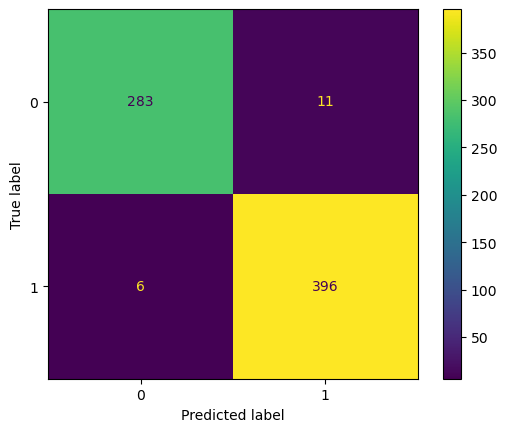

In [208]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
cm = confusion_matrix(y_m_test, predictions)

cm_display = ConfusionMatrixDisplay(cm).plot()

In [209]:
df_m3 = df_m2.drop(columns=ex_columns_rm)
df_m3.head()

,Plot,Adult,Sterile,Myco,SoilMyco,AMF,Phenolics,Lignin,NSC,Census,Time,Event
0,1,34,1,1,1,22.00,-0.56,13.86,12.15,4,14.00,1.00
1,1,30,1,2,2,15.82,5.19,20.52,19.29,33,115.50,0.00
2,1,35,1,2,1,24.45,3.36,24.74,15.01,18,63.00,1.00
3,7,35,1,1,1,22.23,-0.71,14.29,12.36,4,14.00,1.00
4,14,26,1,1,1,21.15,-0.58,10.85,11.20,4,14.00,1.00


In [210]:
y_m = df_m3["Event"]
X_m = df_m3.drop(columns=["Event"])

In [211]:
X_m_train, X_m_test, y_m_train, y_m_test = train_test_split(X_m, y_m, random_state=42)
X_m_train.head()

,Plot,Adult,Sterile,Myco,SoilMyco,AMF,Phenolics,Lignin,NSC,Census,Time
361,6,33,2,1,3,8.73,0.06,7.69,11.93,7,24.50
1845,12,16,1,1,2,21.36,0.68,6.47,10.46,12,42.00
1337,18,14,1,1,2,16.14,0.31,14.16,13.01,7,24.50
1601,11,30,1,1,2,13.31,0.01,10.11,10.79,11,38.50
2600,16,21,1,2,2,30.28,5.26,18.88,23.64,15,52.50


In [212]:
model_lgb = lgb.LGBMClassifier()
model_lgb.fit(X_m_train, y_m_train)

[LightGBM] [Info] Number of positive: 1185, number of negative: 901
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000154 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1125
[LightGBM] [Info] Number of data points in the train set: 2086, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.568073 -> initscore=0.273993
[LightGBM] [Info] Start training from score 0.273993


LGBMClassifier()

In [213]:
predictions = model_lgb.predict(X_m_test)
print(classification_report(y_m_test, predictions))

              precision    recall  f1-score   support

         0.0       0.98      0.95      0.96       294
         1.0       0.97      0.98      0.97       402

    accuracy                           0.97       696
   macro avg       0.97      0.97      0.97       696
weighted avg       0.97      0.97      0.97       696



In [214]:
print(f"Training Model Score: {model_lgb.score(X_m_train, y_m_train)}")
print(f"Testing Model Score: {model_lgb.score(X_m_test, y_m_test)}")

Training Model Score: 1.0
Testing Model Score: 0.9698275862068966


In [215]:
y_m = df_m2["Event"]
X_m = df_m2.drop(columns=["Event"])

In [216]:
X_m_train, X_m_test, y_m_train, y_m_test = train_test_split(X_m, y_m, random_state=42)
X_m_train.head()

,Plot,Species,Light_ISF,Core,Adult,Sterile,Myco,SoilMyco,AMF,Phenolics,Lignin,NSC,Census,Time
361,6,4,0.09,2017,33,2,1,3,8.73,0.06,7.69,11.93,7,24.50
1845,12,4,0.06,2016,16,1,1,2,21.36,0.68,6.47,10.46,12,42.00
1337,18,1,0.14,2016,14,1,1,2,16.14,0.31,14.16,13.01,7,24.50
1601,11,1,0.06,2017,30,1,1,2,13.31,0.01,10.11,10.79,11,38.50
2600,16,2,0.13,2016,21,1,2,2,30.28,5.26,18.88,23.64,15,52.50


In [217]:
model_lgb = lgb.LGBMClassifier() # changed parameters. default works best
model_lgb.fit(X_m_train, y_m_train)

[LightGBM] [Info] Number of positive: 1185, number of negative: 901
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000113 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1187
[LightGBM] [Info] Number of data points in the train set: 2086, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.568073 -> initscore=0.273993
[LightGBM] [Info] Start training from score 0.273993


LGBMClassifier()

In [218]:
predictions = model_lgb.predict(X_m_test)
print(classification_report(y_m_test, predictions))

              precision    recall  f1-score   support

         0.0       0.98      0.96      0.97       294
         1.0       0.97      0.99      0.98       402

    accuracy                           0.98       696
   macro avg       0.98      0.97      0.97       696
weighted avg       0.98      0.98      0.98       696



In [219]:
print(f"Training Model Score: {model_lgb.score(X_m_train, y_m_train)}")
print(f"Testing Model Score: {model_lgb.score(X_m_test, y_m_test)}")

Training Model Score: 1.0
Testing Model Score: 0.9755747126436781


In [220]:
df_m4 = df_m.drop(columns=s_columns_rm)
df_m4.head()

,Plot,Species,Light_ISF,Core,Soil,Adult,Sterile,Conspecific,Myco,SoilMyco,AMF,Phenolics,Lignin,NSC,Census,Time,Event
0,1,1,0.11,2017,1,34,1,1,1,1,22.00,-0.56,13.86,12.15,4,14.00,1.00
1,1,2,0.11,2017,2,30,1,1,2,2,15.82,5.19,20.52,19.29,33,115.50,0.00
2,1,3,0.11,2017,1,35,1,1,2,1,24.45,3.36,24.74,15.01,18,63.00,1.00
3,7,1,0.08,2016,1,35,1,1,1,1,22.23,-0.71,14.29,12.36,4,14.00,1.00
4,14,1,0.06,2017,1,26,1,1,1,1,21.15,-0.58,10.85,11.20,4,14.00,1.00


In [221]:
y_m = df_m4["Event"]
X_m = df_m4.drop(columns=["Event"])

In [222]:
X_m_train, X_m_test, y_m_train, y_m_test = train_test_split(X_m, y_m, random_state=42)
X_m_train.head()

,Plot,Species,Light_ISF,Core,Soil,Adult,Sterile,Conspecific,Myco,SoilMyco,AMF,Phenolics,Lignin,NSC,Census,Time
361,6,4,0.09,2017,5,33,2,2,1,3,8.73,0.06,7.69,11.93,7,24.50
1845,12,4,0.06,2016,2,16,1,1,1,2,21.36,0.68,6.47,10.46,12,42.00
1337,18,1,0.14,2016,7,14,1,1,1,2,16.14,0.31,14.16,13.01,7,24.50
1601,11,1,0.06,2017,2,30,1,1,1,2,13.31,0.01,10.11,10.79,11,38.50
2600,16,2,0.13,2016,4,21,1,1,2,2,30.28,5.26,18.88,23.64,15,52.50


In [223]:
model_lgb = lgb.LGBMClassifier()
model_lgb.fit(X_m_train, y_m_train)

[LightGBM] [Info] Number of positive: 1185, number of negative: 901
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000109 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1199
[LightGBM] [Info] Number of data points in the train set: 2086, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.568073 -> initscore=0.273993
[LightGBM] [Info] Start training from score 0.273993


LGBMClassifier()

In [224]:
predictions = model_lgb.predict(X_m_test)
print(classification_report(y_m_test, predictions))

              precision    recall  f1-score   support

         0.0       0.98      0.96      0.97       294
         1.0       0.97      0.99      0.98       402

    accuracy                           0.98       696
   macro avg       0.98      0.98      0.98       696
weighted avg       0.98      0.98      0.98       696



In [225]:
print(f"Training Model Score: {model_lgb.score(X_m_train, y_m_train)}")
print(f"Testing Model Score: {model_lgb.score(X_m_test, y_m_test)}")

Training Model Score: 1.0
Testing Model Score: 0.9770114942528736


In [226]:
df_2.head()

,Plot,Subplot,Species,Light_ISF,Core,Soil,Adult,Sterile,Conspecific,Myco,SoilMyco,PlantDate,AMF,Phenolics,Lignin,NSC,Census,Time,Event
0,1,C,Acer saccharum,0.11,2017,Prunus serotina,I,Non-Sterile,Heterospecific,AMF,AMF,6/11/18,22.00,-0.56,13.86,12.15,4,14.00,1.00
1,1,C,Quercus alba,0.11,2017,Quercus rubra,970,Non-Sterile,Heterospecific,EMF,EMF,5/25/18,15.82,5.19,20.52,19.29,33,115.50,0.00
2,1,C,Quercus rubra,0.11,2017,Prunus serotina,J,Non-Sterile,Heterospecific,EMF,AMF,5/31/18,24.45,3.36,24.74,15.01,18,63.00,1.00
3,7,D,Acer saccharum,0.08,2016,Prunus serotina,J,Non-Sterile,Heterospecific,AMF,AMF,6/11/18,22.23,-0.71,14.29,12.36,4,14.00,1.00
4,14,A,Acer saccharum,0.06,2017,Prunus serotina,689,Non-Sterile,Heterospecific,AMF,AMF,6/11/18,21.15,-0.58,10.85,11.20,4,14.00,1.00


In [243]:
df_2["PlantDate"] = pd.to_datetime(df_2["PlantDate"])
df_2 = df_2.dropna(subset=["Event"])

In [254]:
df_2['month'] = df_2["PlantDate"].dt.month.astype(int)

In [255]:
df_2 = df_2.drop(columns="PlantDate")

In [256]:
df_mm = df_2[:]
df_mm["Subplot"] = df_mm["Subplot"].map({"A": 1, "B": 2, "C": 3, "D": 4, "E": 5})
df_mm["Species"] = df_mm["Species"].map({"Acer saccharum": 1, "Quercus alba": 2, "Quercus rubra": 3, "Prunus serotina": 4})
df_mm["Soil"] = df_mm["Soil"].map({"Prunus serotina": 1, "Quercus rubra": 2, "Acer rubrum": 3, "Populus grandidentata": 4, "Sterile": 5, 
                                "Acer saccharum": 6, "Quercus alba": 7})
df_mm["Sterile"] = df_mm["Sterile"].map({"Non-Sterile": 1, "Sterile": 2})
df_mm["Conspecific"] = df_mm["Conspecific"].map({"Heterospecific": 1, "Sterilized": 2, "Conspecific": 3})
df_mm["Myco"] = df_mm["Myco"].map({"AMF": 1, "EMF": 2})
df_mm["SoilMyco"] = df_mm["SoilMyco"].map({"AMF": 1, "EMF": 2, "Sterile": 3})

In [265]:
df_mm["Adult"] = le.fit_transform(df_mm["Adult"])
df_mm["Adult"] = df_mm["Adult"].astype("int")

In [266]:
df_mm.corr()

,Plot,Subplot,Species,Light_ISF,Core,Soil,Adult,Sterile,Conspecific,Myco,SoilMyco,AMF,Phenolics,Lignin,NSC,Census,Time,Event,month
Plot,1.00,0.01,0.00,0.25,0.04,-0.00,-0.01,-0.01,0.00,0.01,-0.01,0.08,0.04,-0.01,0.03,-0.06,-0.06,-0.07,-0.01
Subplot,0.01,1.00,-0.00,0.09,0.04,-0.00,0.03,0.02,0.05,0.01,0.01,-0.01,0.01,0.02,0.02,0.00,0.00,-0.00,-0.03
Species,0.00,-0.00,1.00,-0.00,0.07,0.00,0.06,0.00,0.01,-0.01,0.00,0.47,0.05,-0.20,-0.20,-0.02,-0.02,-0.04,0.09
Light_ISF,0.25,0.09,-0.00,1.00,0.05,-0.00,-0.00,-0.01,0.01,0.00,-0.01,0.10,0.10,0.08,0.23,0.02,0.02,-0.05,0.00
Core,0.04,0.04,0.07,0.05,1.00,-0.22,0.16,0.10,0.06,0.09,-0.02,-0.06,0.05,0.09,0.05,0.05,0.05,-0.05,-0.06
Soil,-0.00,-0.00,0.00,-0.00,-0.22,1.00,-0.35,0.22,0.10,-0.01,0.31,-0.04,0.05,-0.02,0.01,-0.02,-0.02,-0.00,-0.05
Adult,-0.01,0.03,0.06,-0.00,0.16,-0.35,1.00,0.06,0.10,-0.01,-0.04,0.04,-0.04,-0.01,-0.05,-0.01,-0.01,0.01,0.05
Sterile,-0.01,0.02,0.00,-0.01,0.10,0.22,0.06,1.00,0.33,0.03,0.76,-0.38,-0.07,-0.00,-0.04,0.04,0.04,-0.08,-0.18
Conspecific,0.00,0.05,0.01,0.01,0.06,0.10,0.10,0.33,1.00,0.00,0.22,-0.17,-0.03,0.03,-0.10,-0.01,-0.01,0.00,-0.06
Myco,0.01,0.01,-0.01,0.00,0.09,-0.01,-0.01,0.03,0.00,1.00,0.02,-0.24,0.94,0.88,0.72,0.38,0.38,-0.60,-0.89


In [267]:
df_mm1 = df_mm.drop(columns=s_columns_rm)
df_mm1.head()

,Plot,Species,Light_ISF,Core,Soil,Adult,Sterile,Conspecific,Myco,SoilMyco,AMF,Phenolics,Lignin,NSC,Census,Time,Event,month
0,1,1,0.11,2017,1,34,1,1,1,1,22.00,-0.56,13.86,12.15,4,14.00,1.00,6
1,1,2,0.11,2017,2,30,1,1,2,2,15.82,5.19,20.52,19.29,33,115.50,0.00,5
2,1,3,0.11,2017,1,35,1,1,2,1,24.45,3.36,24.74,15.01,18,63.00,1.00,5
3,7,1,0.08,2016,1,35,1,1,1,1,22.23,-0.71,14.29,12.36,4,14.00,1.00,6
4,14,1,0.06,2017,1,26,1,1,1,1,21.15,-0.58,10.85,11.20,4,14.00,1.00,6


In [277]:
y_m = df_mm1["Event"]
X_m = df_mm1.drop(columns=["Event"])

In [278]:
X_m_train, X_m_test, y_m_train, y_m_test = train_test_split(X_m, y_m, random_state=42)
X_m_train.head()

,Plot,Species,Light_ISF,Core,Soil,Adult,Sterile,Conspecific,Myco,SoilMyco,AMF,Phenolics,Lignin,NSC,Census,Time,month
361,6,4,0.09,2017,5,33,2,2,1,3,8.73,0.06,7.69,11.93,7,24.50,6
1845,12,4,0.06,2016,2,16,1,1,1,2,21.36,0.68,6.47,10.46,12,42.00,6
1337,18,1,0.14,2016,7,14,1,1,1,2,16.14,0.31,14.16,13.01,7,24.50,6
1601,11,1,0.06,2017,2,30,1,1,1,2,13.31,0.01,10.11,10.79,11,38.50,6
2600,16,2,0.13,2016,4,21,1,1,2,2,30.28,5.26,18.88,23.64,15,52.50,5


In [279]:
model_lgb = lgb.LGBMClassifier()
model_lgb.fit(X_m_train, y_m_train)

[LightGBM] [Info] Number of positive: 1185, number of negative: 901
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000129 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1202
[LightGBM] [Info] Number of data points in the train set: 2086, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.568073 -> initscore=0.273993
[LightGBM] [Info] Start training from score 0.273993


LGBMClassifier()

In [280]:
print(f"Training Model Score: {model_lgb.score(X_mm_train, y_m_train)}")
print(f"Testing Model Score: {model_lgb.score(X_mm_test, y_m_test)}")

Training Model Score: 1.0
Testing Model Score: 0.9770114942528736
